In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
data = np.loadtxt("dataset.csv", delimiter=" ", skiprows=0)
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


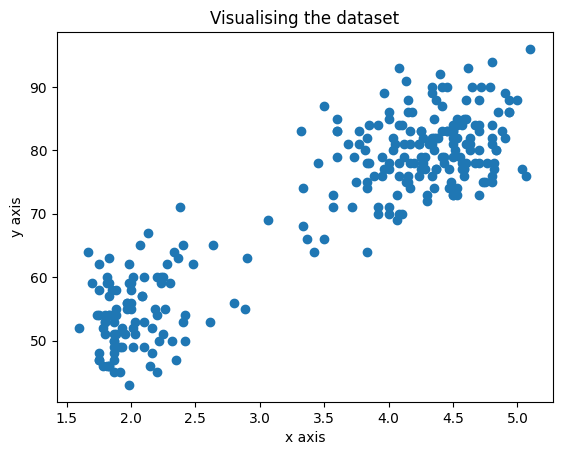

In [4]:
plt.title('Visualising the dataset')
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

### Initialize your cluster centers

In [3]:
def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data

    Args:
        data: shape = (N, d). original data.
        k: integer number. predefined number of clusters for the k-means algorithm.
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    N, d = data.shape
    return data[np.random.choice(N, k, replace = 'False')]

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

In [4]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.

    Args:
        data: numpy array of shape = (N, d). original data.
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    N, d = data.shape
    k, _ = mu.shape
    # TODO 
    ... 
    return distance_matrix

#### Update k-means parameters

In [5]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to,
            then update the parameter cluster centers.

    Args:
        data:   numpy array of shape = (N, d). original data.
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    _, d = data.shape
    k, _ = mu_old.shape
    # TODO 
    distance_matrix = ... 
    losses = ...
    # vector which contains the cluster associated to each data point
    assignments = ...

    # update the mu
    mu = np.zeros((k, d))
    for j in range(k):
        # update the centroid of the cluster
        # TODO
        mu[j, :] = ... 
    return losses, assignments, np.nan_to_num(mu)

#### Play with k-means

The current iteration of k-means is: 0,                    the average loss is 136.03748451838237.


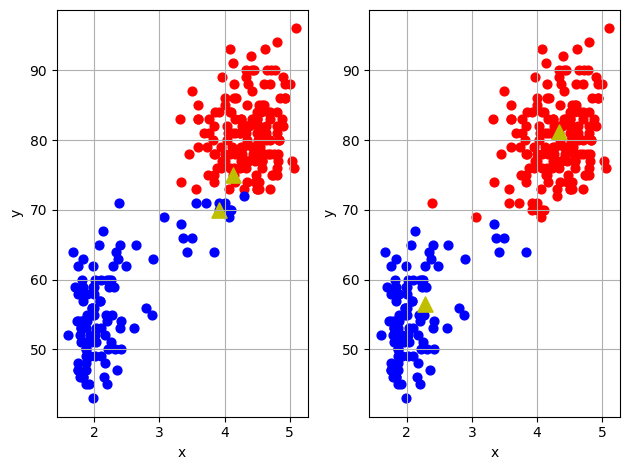

The current iteration of k-means is: 1,                    the average loss is 34.18718280197384.


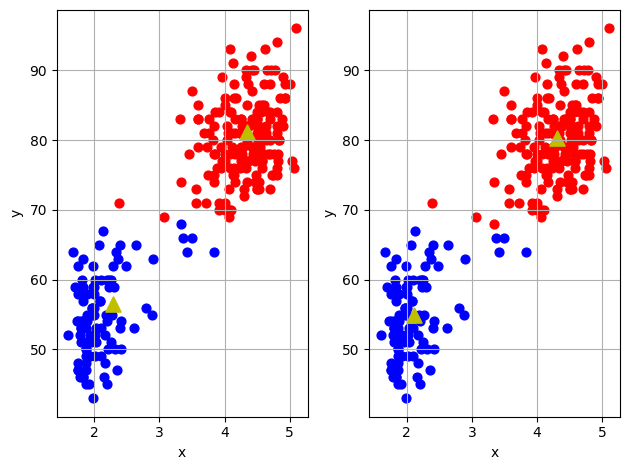

The current iteration of k-means is: 2,                    the average loss is 32.73675733630585.


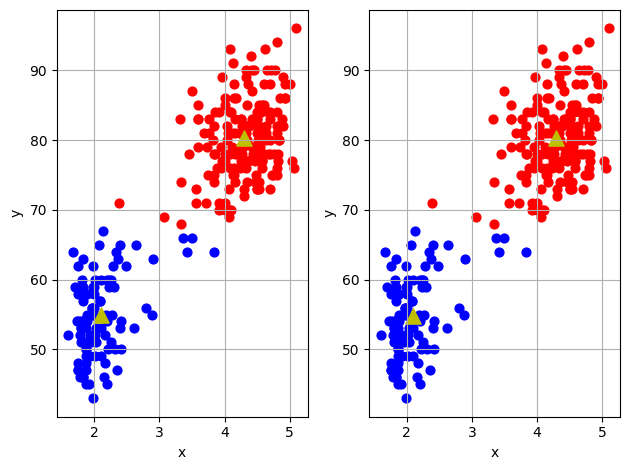

The current iteration of k-means is: 3,                    the average loss is 32.72709088583533.


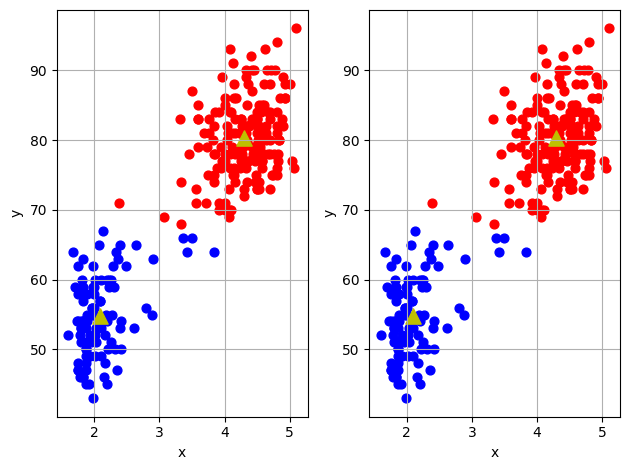

The current iteration of k-means is: 4,                    the average loss is 32.72709088583533.


In [11]:
from plots import plot

def kmeans(data, k, max_iters, threshold, verbose=True):
    """run the k-means algorithm."""
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old)
        # update k-means information.
        mu_old = mu
    return average_loss

# define parameters
k = 2
max_iters = 10
threshold = 1e-5

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

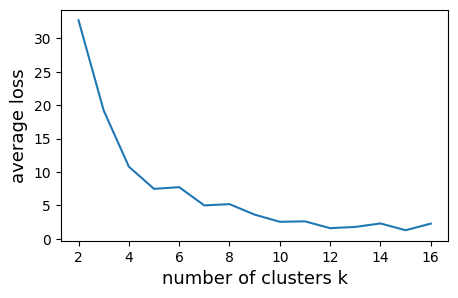

In [10]:
# don't worry about empty slice warnings
import warnings
warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose=False)
    losses += [average_loss]
plt.figure(figsize=(5, 3))
plt.xlabel("number of clusters k", fontsize=13)
plt.ylabel("average loss", fontsize=13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [12]:
from matplotlib.pyplot import imread
original_image = imread("mandrill.png")
print("Original image: the shape of image={s}, the data type={dt}.".format( s=original_image.shape, dt=original_image.dtype ))

processed_image = original_image.reshape((original_image.shape[0] * original_image.shape[1], 3))
processed_image = processed_image.astype(float)
print("Current image: the shape of image={s}, the data type={dt}.".format(s=processed_image.shape, dt=processed_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=float32.
Current image: the shape of image=(230400, 3), the data type=float64.


The current iteration of kmeans is: 0, the average loss is 0.1089201094120132.
The current iteration of kmeans is: 10, the average loss is 0.07605902521817262.


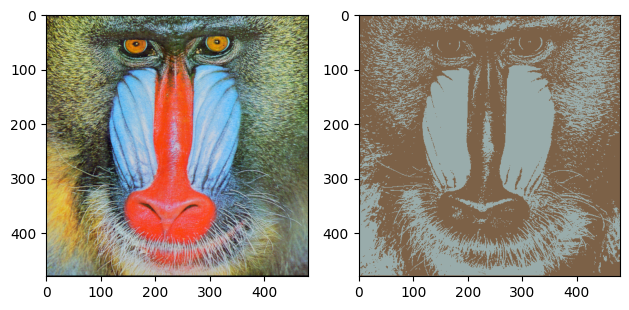

In [9]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args:
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """
    mu_old = initialize_clusters(processed_image, k)

    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans
    for iter in range(max_iter):
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)

        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)

        if iter % 10 == 0:
            print(
                "The current iteration of kmeans is: {i}, the average loss is {l}.".format(
                    i=iter, l=average_loss
                )
            )

        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break

        # update mu
        mu_old = mu

    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)


# define parameters
k = 2
max_iter = 100
threshold = 1e-7 

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)